In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = 'Account Receivables_Age Credit Balance Report.xlsx'
data = pd.read_excel(file_path)

# Ensure the relevant columns are present
print("Columns in the dataset:", data.columns)


Columns in the dataset: Index([              'Account Number',                         'Site',
                 'Profile Class Name',             'Customer Balance',
                  1930-01-01 00:00:00,                        '31-60',
                              '60-90',                          '90+',
                 'Transaction Number',             'Transaction Date',
                           'Due Date', 'Original Transaction Balance',
                'Outstanding Balance',                'Unpaid Reason'],
      dtype='object')


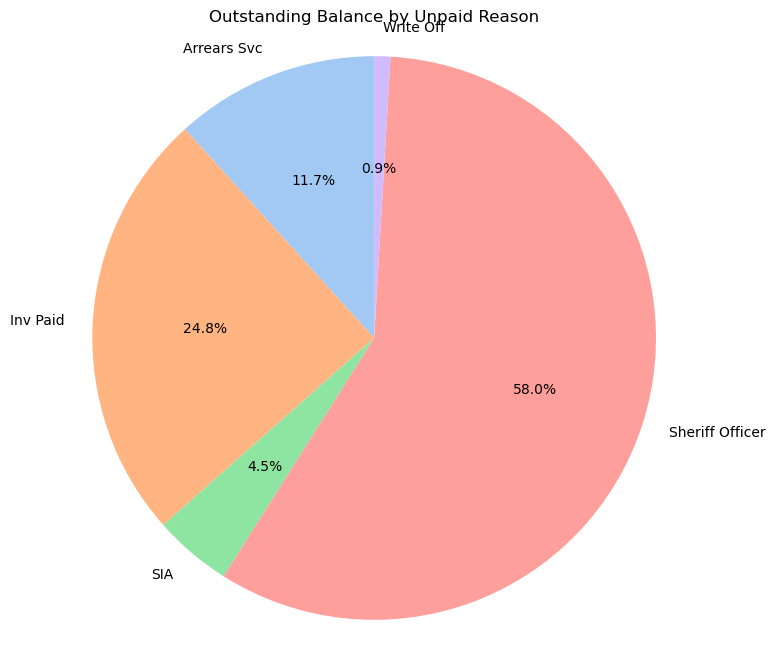

Pie Chart Values (Unpaid Reason vs Sum of Outstanding Balance):
 Unpaid Reason
Arrears Svc         41.90
Inv Paid            88.80
SIA                 16.04
Sheriff Officer    207.58
Write Off            3.30
Name: Outstanding Balance, dtype: float64
Summary of Pie Chart:
 count      5.000000
mean      71.524000
std       82.795328
min        3.300000
25%       16.040000
50%       41.900000
75%       88.800000
max      207.580000
Name: Outstanding Balance, dtype: float64


In [3]:
# Group data by Unpaid Reason and sum the Outstanding Balance
unpaid_reason_data = data.groupby('Unpaid Reason')['Outstanding Balance'].sum()

# Pie plot
plt.figure(figsize=(8, 8))
plt.pie(unpaid_reason_data, labels=unpaid_reason_data.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Outstanding Balance by Unpaid Reason')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()

# Print the values and summary
print("Pie Chart Values (Unpaid Reason vs Sum of Outstanding Balance):\n", unpaid_reason_data)
print("Summary of Pie Chart:\n", unpaid_reason_data.describe())


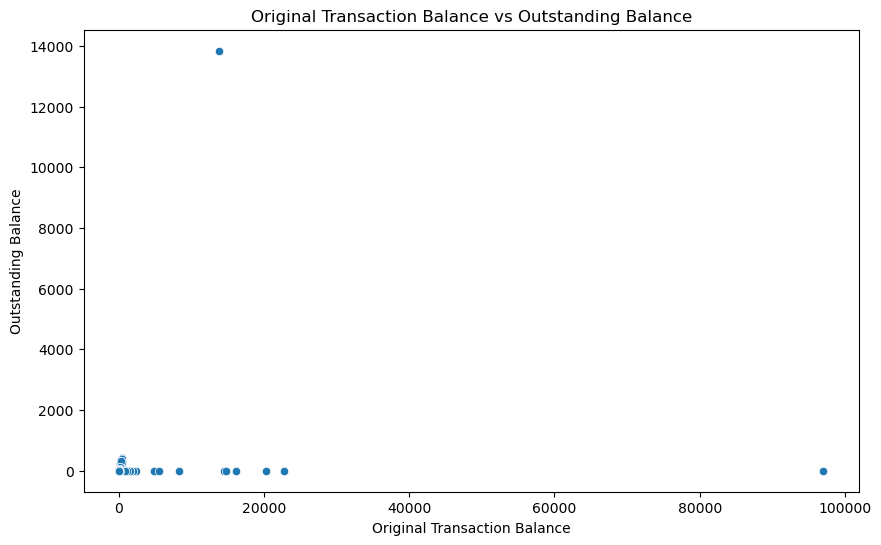

Scatter Plot Values (Original Transaction Balance vs Outstanding Balance):
     Original Transaction Balance  Outstanding Balance
0                         1277.66                 0.00
1                           57.00                 0.00
2                          472.00                 0.00
3                          428.20                 0.00
5                        20239.27                 0.00
..                            ...                  ...
648                         55.90                17.57
649                         55.90                16.04
650                         55.90                 0.00
651                         55.90                 0.00
652                         55.90                 0.00

[549 rows x 2 columns]
Summary of Scatter Plot:
        Original Transaction Balance  Outstanding Balance
count                    549.000000           549.000000
mean                     598.067832            42.387632
std                     4534.600369         

In [4]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Original Transaction Balance'], y=data['Outstanding Balance'])
plt.title('Original Transaction Balance vs Outstanding Balance')
plt.xlabel('Original Transaction Balance')
plt.ylabel('Outstanding Balance')
plt.show()

# Print the values and summary
print("Scatter Plot Values (Original Transaction Balance vs Outstanding Balance):")
print(data[['Original Transaction Balance', 'Outstanding Balance']].dropna())
print("Summary of Scatter Plot:\n", data[['Original Transaction Balance', 'Outstanding Balance']].describe())


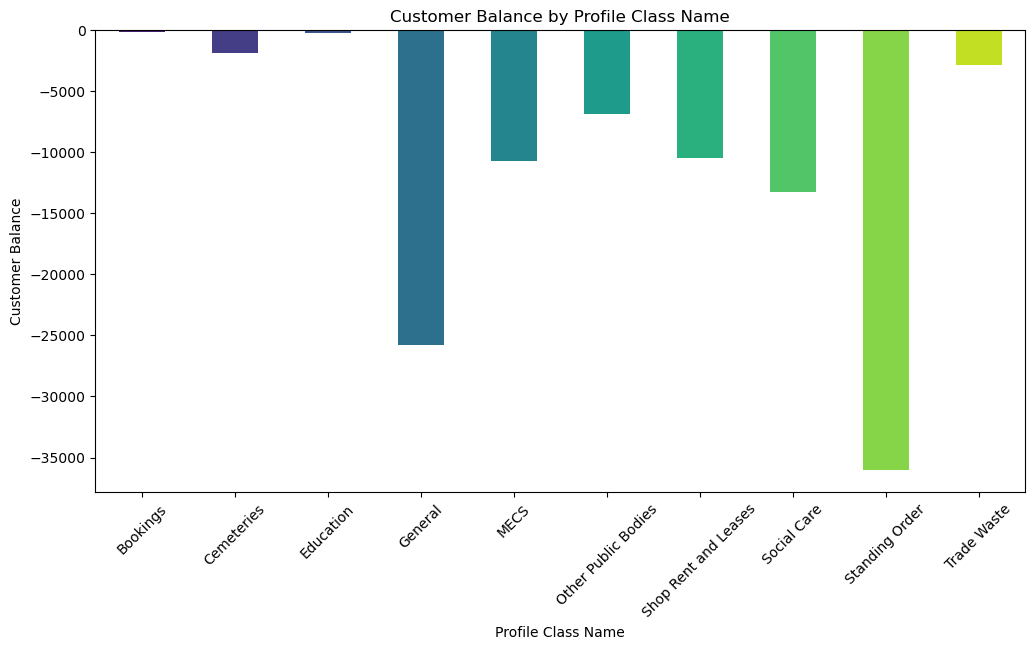

Clustered Bar Chart Values (Profile Class Name vs Sum of Customer Balance):
 Profile Class Name
Bookings                 -118.38
Cemeteries              -1867.69
Education                -258.35
General                -25771.53
MECS                   -10683.40
Other Public Bodies     -6825.05
Shop Rent and Leases   -10444.27
Social Care            -13226.55
Standing Order         -36044.11
Trade Waste             -2877.75
Name: Customer Balance, dtype: float64
Summary of Clustered Bar Chart:
 count       10.000000
mean    -10811.708000
std      11789.875783
min     -36044.110000
25%     -12590.762500
50%      -8634.660000
75%      -2120.205000
max       -118.380000
Name: Customer Balance, dtype: float64


In [5]:
# Group data by Profile Class Name and sum the Customer Balance
profile_class_data = data.groupby('Profile Class Name')['Customer Balance'].sum()

# Clustered bar chart
plt.figure(figsize=(12, 6))
profile_class_data.plot(kind='bar', color=sns.color_palette('viridis', len(profile_class_data)))
plt.title('Customer Balance by Profile Class Name')
plt.xlabel('Profile Class Name')
plt.ylabel('Customer Balance')
plt.xticks(rotation=45)
plt.show()

# Print the values and summary
print("Clustered Bar Chart Values (Profile Class Name vs Sum of Customer Balance):\n", profile_class_data)
print("Summary of Clustered Bar Chart:\n", profile_class_data.describe())


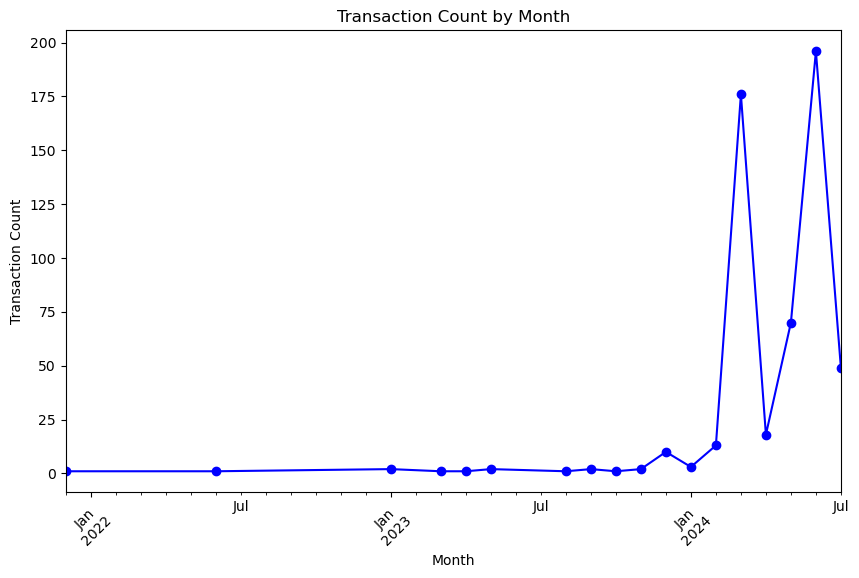

Line Chart Values (Transaction Date Month vs Count of Transactions):
 Transaction Date Month
2021-12      1
2022-06      1
2023-01      2
2023-03      1
2023-04      1
2023-05      2
2023-08      1
2023-09      2
2023-10      1
2023-11      2
2023-12     10
2024-01      3
2024-02     13
2024-03    176
2024-04     18
2024-05     70
2024-06    196
2024-07     49
Freq: M, Name: Transaction Number, dtype: int64
Summary of Line Chart:
 count     18.000000
mean      30.500000
std       59.691609
min        1.000000
25%        1.000000
50%        2.000000
75%       16.750000
max      196.000000
Name: Transaction Number, dtype: float64


In [6]:
# Convert Transaction Date to month format
data['Transaction Date Month'] = pd.to_datetime(data['Transaction Date']).dt.to_period('M')

# Group by month and count the number of transactions
monthly_transaction_data = data.groupby('Transaction Date Month')['Transaction Number'].count()

# Line chart
plt.figure(figsize=(10, 6))
monthly_transaction_data.plot(kind='line', marker='o', color='b')
plt.title('Transaction Count by Month')
plt.xlabel('Month')
plt.ylabel('Transaction Count')
plt.xticks(rotation=45)
plt.show()

# Print the values and summary
print("Line Chart Values (Transaction Date Month vs Count of Transactions):\n", monthly_transaction_data)
print("Summary of Line Chart:\n", monthly_transaction_data.describe())


In [7]:
# Calculate totals and counts
total_customer_balance = data['Customer Balance'].sum()
total_outstanding_balance = data['Outstanding Balance'].sum()
transaction_count = data['Transaction Number'].count()

# Print the card values
print(f"Total Customer Balance: {total_customer_balance:.2f}")
print(f"Total Outstanding Balance: {total_outstanding_balance:.2f}")
print(f"Total Number of Transactions: {transaction_count}")


Total Customer Balance: -108117.08
Total Outstanding Balance: 23270.81
Total Number of Transactions: 549
